K-MEANS FROM SCRATCH

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
from sklearn.cluster import KMeans as SK_KMeans


In [ ]:
data_dir = "/content/drive/MyDrive/processed_unsupervised"

X = pd.read_csv(f"{data_dir}/X_scaled.csv")
X_array = X.values

print("Shape du dataset :", X_array.shape)


Shape du dataset : (62645, 24)


In [ ]:
class KMeansScratch:
    def __init__(self, k=3, max_iters=200, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape

        # Initialisation aléatoire des centroïdes
        indices = np.random.choice(n_samples, self.k, replace=False)
        centroids = X[indices]

        for _ in range(self.max_iters):
            # Distances euclidiennes
            distances = np.sqrt(((X[:, None] - centroids) ** 2).sum(axis=2))

            # Assignation des clusters
            labels = np.argmin(distances, axis=1)

            # Mise à jour des centroïdes
            new_centroids = np.array([
                X[labels == i].mean(axis=0)
                if np.any(labels == i)
                else centroids[i]
                for i in range(self.k)
            ])

            # Critère de convergence
            if np.linalg.norm(new_centroids - centroids) < self.tol:
                print("Convergence atteinte.")
                break

            centroids = new_centroids

        self.centroids = centroids
        self.labels_ = labels
        return labels


In [ ]:
k = 3
kmeans_scratch = KMeansScratch(k=k)
labels_scratch = kmeans_scratch.fit(X_array)


Convergence atteinte.


In [ ]:
def pca_from_scratch(X, n_components=2):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)

    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
    sorted_idx = np.argsort(eigen_values)[::-1]
    eigen_vectors = eigen_vectors[:, sorted_idx]

    components = eigen_vectors[:, :n_components]
    return X_centered @ components


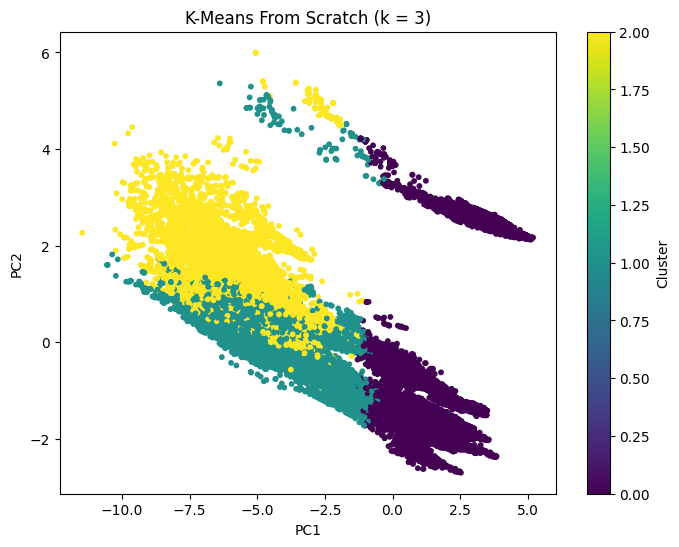

In [ ]:
X_pca = pca_from_scratch(X_array, n_components=2)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels_scratch,
    cmap="viridis",
    s=10
)
plt.title("K-Means From Scratch (k = 3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
print("\n=== EVALUATION SCRATCH ===")
print("Silhouette :", silhouette_score(X_array, labels_scratch))
print("Calinski-Harabasz :", calinski_harabasz_score(X_array, labels_scratch))
print("Davies-Bouldin :", davies_bouldin_score(X_array, labels_scratch))



=== EVALUATION SCRATCH ===
Silhouette : 0.3386982975391019
Calinski-Harabasz : 26168.426359482117
Davies-Bouldin : 1.497449373807833


In [ ]:
kmeans_sk = SK_KMeans(n_clusters=k, random_state=42, n_init=10)
labels_sk = kmeans_sk.fit_predict(X_array)

print("\n=== COMPARAISON SCIKIT-LEARN ===")
print(
    "Pourcentage de labels identiques :",
    np.mean(labels_sk == labels_scratch) * 100,
    "%"
)



=== COMPARAISON SCIKIT-LEARN ===
Pourcentage de labels identiques : 54.984436108228905 %


In [ ]:
df_result = X.copy()
df_result["cluster_scratch"] = labels_scratch
df_result["cluster_sklearn"] = labels_sk

output_path = f"{data_dir}/X_clustered_kmeans_k3_final.csv"
df_result.to_csv(output_path, index=False)

print("Résultats sauvegardés dans :", output_path)


Résultats sauvegardés dans : /content/drive/MyDrive/processed_unsupervised/X_clustered_kmeans_k3_final.csv



=== EVALUATION SCIKIT-LEARN ===
Silhouette : 0.363566974453337
Calinski-Harabasz : 36014.53352721554
Davies-Bouldin : 1.0679591912380249


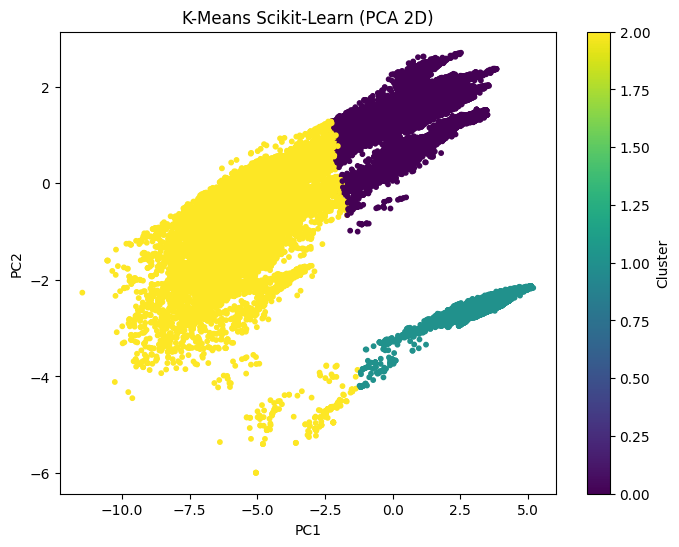

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# K-Means avec Scikit-Learn
k = 3
kmeans_sk = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_sk = kmeans_sk.fit_predict(X_array)

# Evaluation du clustering Sklearn
print("\n=== EVALUATION SCIKIT-LEARN ===")
print("Silhouette :", silhouette_score(X_array, labels_sk))
print("Calinski-Harabasz :", calinski_harabasz_score(X_array, labels_sk))
print("Davies-Bouldin :", davies_bouldin_score(X_array, labels_sk))

# Visualisation PCA 2D avec Scikit-Learn
pca = PCA(n_components=2)
X_pca_sk = pca.fit_transform(X_array)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_pca_sk[:,0], X_pca_sk[:,1], c=labels_sk, cmap="viridis", s=10)
plt.title("K-Means Scikit-Learn (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


CHARGEMENT ET PRÉPARATION DES DONNÉES
Dimensions du dataset : (62645, 24)
Nombre d'échantillons : 62645
Nombre de features : 24

RÉDUCTION EN DIMENSION POUR VISUALISATION
Dimensions après PCA: (62645, 2)

EXÉCUTION DE K-MEANS FROM SCRATCH
Temps d'exécution: 10.85 secondes
Nombre d'itérations: 12
Inertie (WCSS): 834478.57
Taille des clusters: [np.int64(43378), np.int64(17847), np.int64(1420)]

EXÉCUTION DE K-MEANS AVEC SCIKIT-LEARN
Temps d'exécution: 0.77 secondes
Nombre d'itérations: 5
Inertie (WCSS): 699340.97
Taille des clusters: [np.int64(31511), np.int64(14560), np.int64(16574)]

ÉVALUATION DES RÉSULTATS

TABLEAU COMPARATIF DES PERFORMANCES:
----------------------------------------------------------------------
                  From Scratch Scikit-learn Différence (%)
Inertie (WCSS)       834478.57    699340.97          +19.3
Silhouette              0.3936       0.3636           +3.0
Calinski-Harabasz     25110.04     36014.53          -30.3
Davies-Bouldin          1.0701       1.

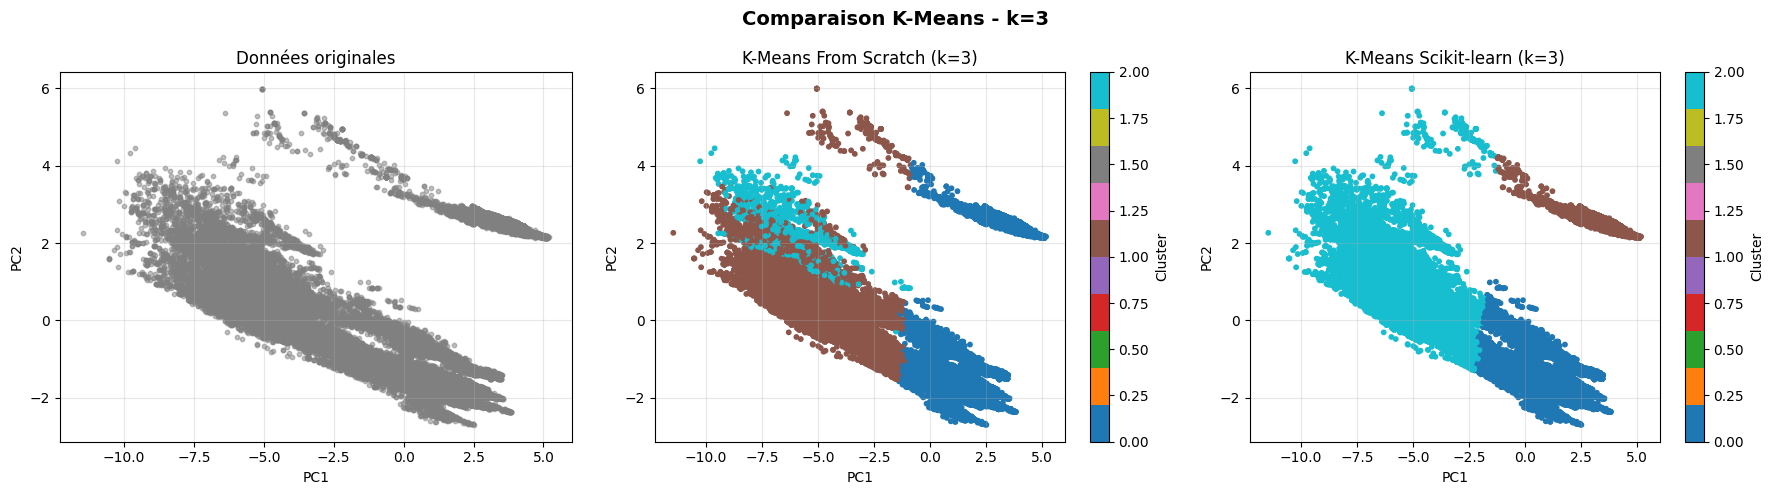

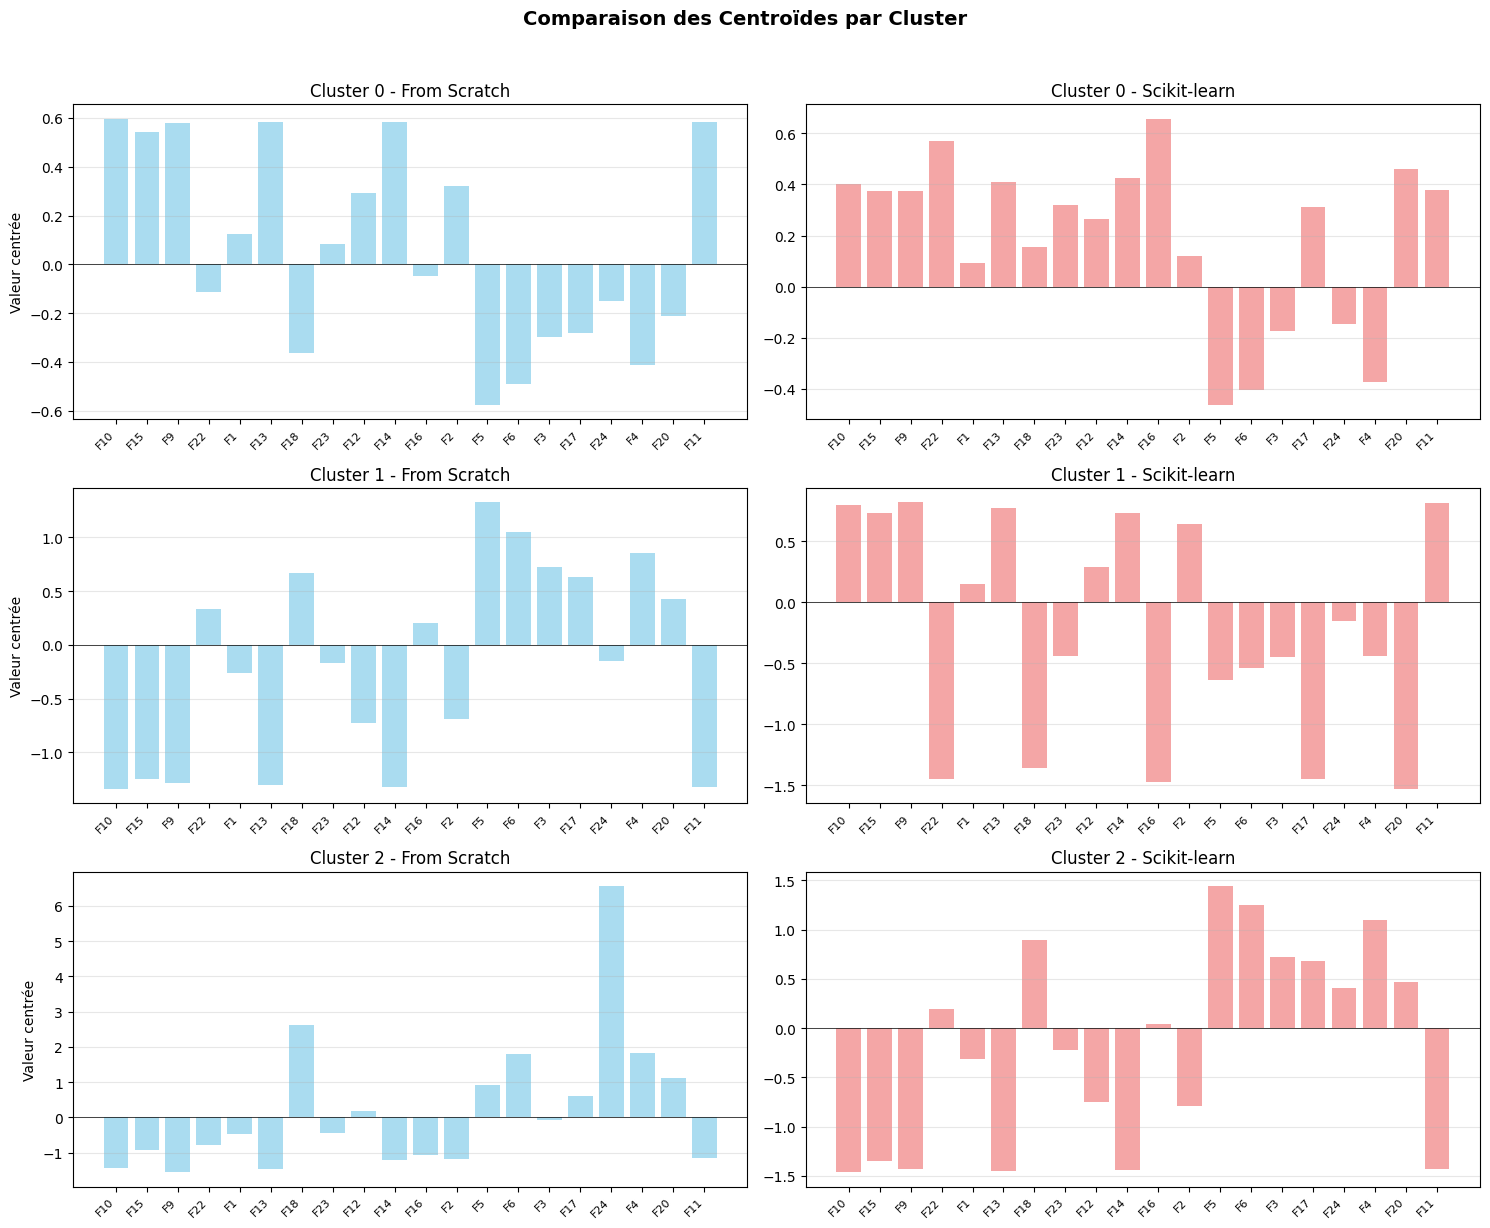


Adjusted Rand Index (similarité): 0.4478

Matrice de confusion (From Scratch vs Scikit-learn):
[[28852 14526     0]
 [ 2627    34 15186]
 [   32     0  1388]]


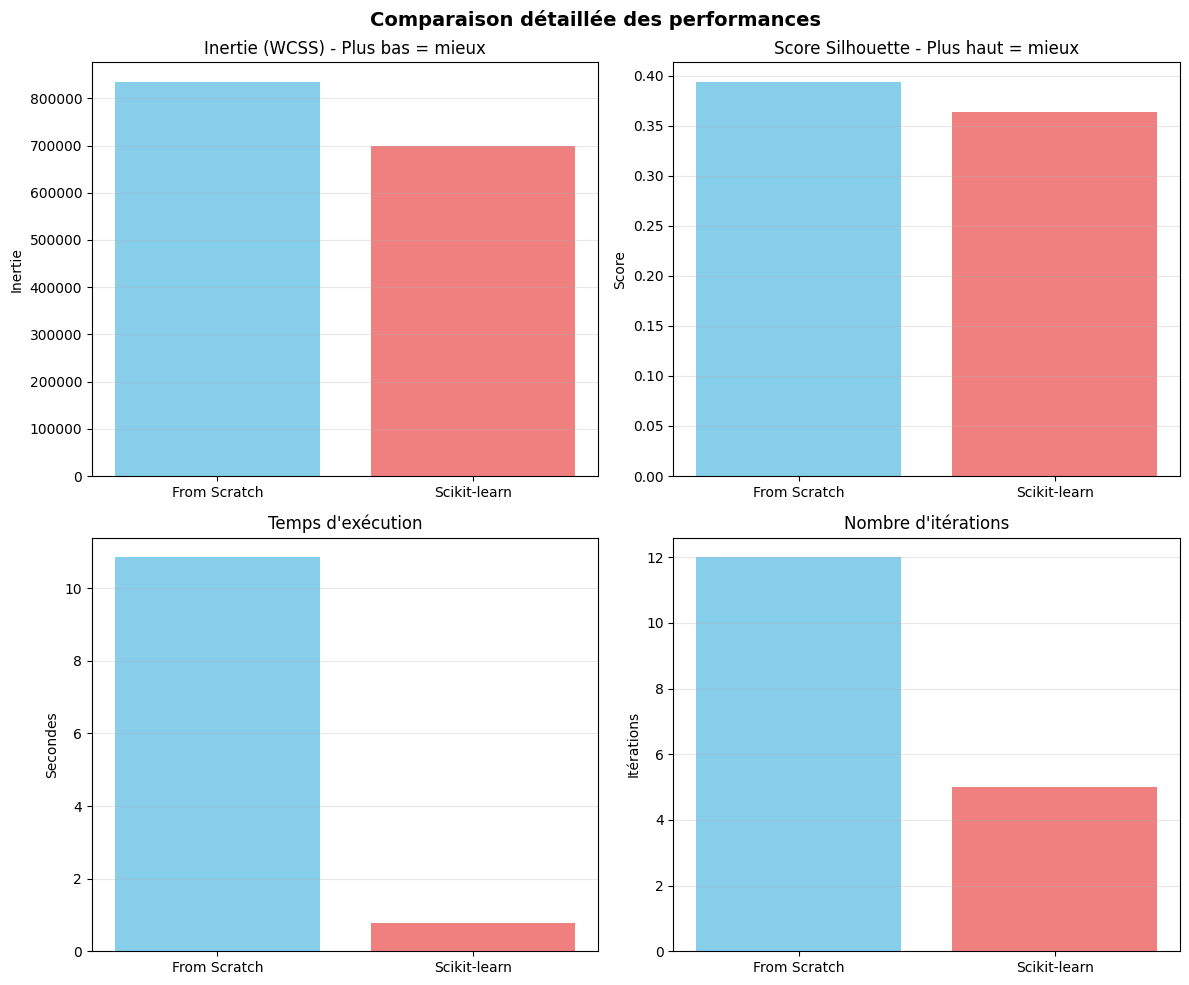


ANALYSE DE LA STABILITÉ

Test de stabilité avec différentes initialisations:
--------------------------------------------------
Run 1: Scratch=699340.96, Sklearn=819116.04
Run 2: Scratch=832229.18, Sklearn=699341.82
Run 3: Scratch=819115.79, Sklearn=699341.20
Run 4: Scratch=699340.96, Sklearn=819126.13
Run 5: Scratch=699340.96, Sklearn=819117.36

Variabilité de l'inertie:
  From Scratch: écart-type = 62028.33 (coeff variation = 8.3%)
  Scikit-learn: écart-type = 58679.16 (coeff variation = 7.6%)

SAUVEGARDE DES RÉSULTATS
Résultats sauvegardés dans : /content/drive/MyDrive/processed_unsupervised/kmeans_comparison_results.csv
Centroïdes sauvegardés dans : /content/drive/MyDrive/processed_unsupervised/kmeans_centroids_comparison.csv

CONCLUSION ET RECOMMANDATIONS

📊 SYNTHÈSE DE LA COMPARAISON :
--------------------------------------------------
1. PERFORMANCE :
   • Scikit-learn est 14.0x plus rapide
   • Qualité similaire (ARI = 0.448)

2. QUALITÉ DES CLUSTERS :
   • Scores silhouette t

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. CHARGEMENT ET PRÉPARATION DES DONNÉES
# ============================================================================

print("="*70)
print("CHARGEMENT ET PRÉPARATION DES DONNÉES")
print("="*70)

# Charger les données
data_dir = "/content/drive/MyDrive/processed_unsupervised"
df = pd.read_csv(f"{data_dir}/X_scaled.csv")
X = df.values

print(f"Dimensions du dataset : {X.shape}")
print(f"Nombre d'échantillons : {X.shape[0]}")
print(f"Nombre de features : {X.shape[1]}")

# Normalisation supplémentaire pour assurer de bonnes performances
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================================================
# 2. IMPLÉMENTATION K-MEANS FROM SCRATCH
# ============================================================================

class KMeansFromScratch:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=42):
        """
        Implémentation de K-Means from scratch

        Paramètres:
        - n_clusters: nombre de clusters (k)
        - max_iter: nombre maximum d'itérations
        - tol: tolérance pour la convergence
        - random_state: seed pour la reproductibilité
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        self.inertia_ = None
        self.n_iter_ = 0

    def _initialize_centroids(self, X):
        """Initialisation des centroïdes par la méthode k-means++"""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        # Premier centroïde choisi aléatoirement
        centroids = np.zeros((self.n_clusters, n_features))
        centroids[0] = X[np.random.randint(n_samples)]

        # Choix des centroïdes suivants avec probabilité proportionnelle à D²
        for i in range(1, self.n_clusters):
            # Calculer les distances minimales aux centroïdes existants
            distances = np.zeros(n_samples)
            for j in range(n_samples):
                min_dist = float('inf')
                for k in range(i):
                    dist = np.linalg.norm(X[j] - centroids[k])
                    if dist < min_dist:
                        min_dist = dist
                distances[j] = min_dist ** 2

            # Choisir le prochain centroïde avec probabilité proportionnelle à D²
            probabilities = distances / distances.sum()
            cumulative_prob = np.cumsum(probabilities)
            r = np.random.rand()
            next_idx = np.searchsorted(cumulative_prob, r)
            centroids[i] = X[next_idx]

        return centroids

    def _assign_clusters(self, X, centroids):
        """Assignation des points au cluster le plus proche"""
        n_samples = X.shape[0]
        labels = np.zeros(n_samples, dtype=int)

        for i in range(n_samples):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        return labels

    def _update_centroids(self, X, labels):
        """Mise à jour des centroïdes"""
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))

        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = np.mean(cluster_points, axis=0)
            else:
                # Réinitialisation si cluster vide
                new_centroids[k] = X[np.random.randint(X.shape[0])]

        return new_centroids

    def fit(self, X):
        """Entraînement de l'algorithme K-Means"""
        start_time = time.time()

        # Initialisation
        self.centroids = self._initialize_centroids(X)

        # Boucle d'optimisation
        for iteration in range(self.max_iter):
            # Assignation
            old_labels = self.labels.copy() if self.labels is not None else None
            self.labels = self._assign_clusters(X, self.centroids)

            # Vérification de la convergence
            if old_labels is not None and np.array_equal(self.labels, old_labels):
                self.n_iter_ = iteration
                break

            # Mise à jour des centroïdes
            old_centroids = self.centroids.copy()
            self.centroids = self._update_centroids(X, self.labels)

            # Vérification de la convergence sur les centroïdes
            centroid_shift = np.linalg.norm(self.centroids - old_centroids, axis=1).max()
            if centroid_shift < self.tol:
                self.n_iter_ = iteration
                break

            self.n_iter_ = iteration

        # Calcul de l'inertie (WCSS)
        self.inertia_ = self._calculate_inertia(X)

        self.fit_time_ = time.time() - start_time

        return self

    def _calculate_inertia(self, X):
        """Calcul de l'inertie totale (WCSS)"""
        inertia = 0
        for k in range(self.n_clusters):
            cluster_points = X[self.labels == k]
            if len(cluster_points) > 0:
                inertia += np.sum(np.linalg.norm(
                    cluster_points - self.centroids[k], axis=1) ** 2)
        return inertia

    def predict(self, X):
        """Prédiction des clusters pour de nouvelles données"""
        return self._assign_clusters(X, self.centroids)

    def fit_predict(self, X):
        """Entraînement et prédiction en une étape"""
        self.fit(X)
        return self.labels

# ============================================================================
# 3. FONCTIONS D'ÉVALUATION
# ============================================================================

def evaluate_clustering(X, labels, centroids=None, method_name=""):
    """
    Évaluation complète d'un clustering
    """
    if len(np.unique(labels)) < 2:
        print(f"Attention: {method_name} n'a trouvé qu'un seul cluster!")
        return {}

    results = {
        'method': method_name,
        'n_clusters': len(np.unique(labels)),
        'cluster_sizes': [np.sum(labels == k) for k in np.unique(labels)],
        'inertia': None
    }

    # Calcul de l'inertie si centroïdes disponibles
    if centroids is not None:
        inertia = 0
        for k in np.unique(labels):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                inertia += np.sum(np.linalg.norm(
                    cluster_points - centroids[k], axis=1) ** 2)
        results['inertia'] = inertia

    # Métriques de qualité
    try:
        results['silhouette'] = silhouette_score(X, labels)
        results['calinski_harabasz'] = calinski_harabasz_score(X, labels)
        results['davies_bouldin'] = davies_bouldin_score(X, labels)
    except Exception as e:
        print(f"Erreur dans le calcul des métriques pour {method_name}: {e}")
        results['silhouette'] = 0
        results['calinski_harabasz'] = 0
        results['davies_bouldin'] = float('inf')

    # Calcul de la séparation entre clusters
    if centroids is not None and len(centroids) > 1:
        inter_cluster_dist = []
        for i in range(len(centroids)):
            for j in range(i+1, len(centroids)):
                dist = np.linalg.norm(centroids[i] - centroids[j])
                inter_cluster_dist.append(dist)
        results['avg_inter_cluster_dist'] = np.mean(inter_cluster_dist)
        results['min_inter_cluster_dist'] = np.min(inter_cluster_dist)

    return results

def plot_clusters_comparison(X_2d, labels_scratch, labels_sklearn, title="Comparaison K-Means"):
    """
    Visualisation comparative des clusters
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Scatter plot original
    axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c='gray', alpha=0.5, s=10)
    axes[0].set_title('Données originales')
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')
    axes[0].grid(True, alpha=0.3)

    # Clustering from scratch
    scatter1 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1],
                               c=labels_scratch, cmap='tab10', s=10)
    axes[1].set_title('K-Means From Scratch (k=3)')
    axes[1].set_xlabel('PC1')
    axes[1].set_ylabel('PC2')
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(scatter1, ax=axes[1], label='Cluster')

    # Clustering scikit-learn
    scatter2 = axes[2].scatter(X_2d[:, 0], X_2d[:, 1],
                               c=labels_sklearn, cmap='tab10', s=10)
    axes[2].set_title('K-Means Scikit-learn (k=3)')
    axes[2].set_xlabel('PC1')
    axes[2].set_ylabel('PC2')
    axes[2].grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=axes[2], label='Cluster')

    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_centroid_comparison(centroids_scratch, centroids_sklearn, feature_names=None):
    """
    Comparaison visuelle des centroïdes
    """
    n_features = centroids_scratch.shape[1]
    if feature_names is None:
        feature_names = [f'Feature {i+1}' for i in range(n_features)]

    # Limiter à 20 features pour la lisibilité
    if n_features > 20:
        indices = np.random.choice(n_features, 20, replace=False)
        centroids_scratch = centroids_scratch[:, indices]
        centroids_sklearn = centroids_sklearn[:, indices]
        feature_names = [feature_names[i] for i in indices]
        n_features = 20

    fig, axes = plt.subplots(3, 2, figsize=(15, 12))

    for k in range(3):
        # Centroïde from scratch
        axes[k, 0].bar(range(n_features), centroids_scratch[k],
                       color='skyblue', alpha=0.7)
        axes[k, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        axes[k, 0].set_title(f'Cluster {k} - From Scratch')
        axes[k, 0].set_ylabel('Valeur centrée')
        axes[k, 0].grid(True, alpha=0.3, axis='y')

        # Centroïde scikit-learn
        axes[k, 1].bar(range(n_features), centroids_sklearn[k],
                       color='lightcoral', alpha=0.7)
        axes[k, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        axes[k, 1].set_title(f'Cluster {k} - Scikit-learn')
        axes[k, 1].grid(True, alpha=0.3, axis='y')

    # Rotation des labels x pour la lisibilité
    for ax in axes.flat:
        ax.set_xticks(range(n_features))
        ax.set_xticklabels(feature_names, rotation=45, ha='right', fontsize=8)

    plt.suptitle('Comparaison des Centroïdes par Cluster',
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# ============================================================================
# 4. RÉDUCTION EN DIMENSION POUR VISUALISATION
# ============================================================================

def pca_from_scratch(X, n_components=2):
    """PCA simplifiée pour visualisation"""
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    components = eigenvectors[:, :n_components]
    X_pca = np.dot(X_centered, components)
    return X_pca

print("\n" + "="*70)
print("RÉDUCTION EN DIMENSION POUR VISUALISATION")
print("="*70)

X_2d = pca_from_scratch(X_scaled, n_components=2)
print(f"Dimensions après PCA: {X_2d.shape}")

# ============================================================================
# 5. EXÉCUTION DES DEUX MÉTHODES
# ============================================================================

print("\n" + "="*70)
print("EXÉCUTION DE K-MEANS FROM SCRATCH")
print("="*70)

# K-Means from scratch
start_time = time.time()
kmeans_scratch = KMeansFromScratch(n_clusters=3, random_state=42)
labels_scratch = kmeans_scratch.fit_predict(X_scaled)
scratch_time = time.time() - start_time

print(f"Temps d'exécution: {scratch_time:.2f} secondes")
print(f"Nombre d'itérations: {kmeans_scratch.n_iter_}")
print(f"Inertie (WCSS): {kmeans_scratch.inertia_:.2f}")
print(f"Taille des clusters: {[np.sum(labels_scratch == k) for k in range(3)]}")

print("\n" + "="*70)
print("EXÉCUTION DE K-MEANS AVEC SCIKIT-LEARN")
print("="*70)

# K-Means scikit-learn
start_time = time.time()
kmeans_sklearn = SKLearnKMeans(n_clusters=3, random_state=42, n_init=10)
labels_sklearn = kmeans_sklearn.fit_predict(X_scaled)
sklearn_time = time.time() - start_time

print(f"Temps d'exécution: {sklearn_time:.2f} secondes")
print(f"Nombre d'itérations: {kmeans_sklearn.n_iter_}")
print(f"Inertie (WCSS): {kmeans_sklearn.inertia_:.2f}")
print(f"Taille des clusters: {[np.sum(labels_sklearn == k) for k in range(3)]}")

# ============================================================================
# 6. ÉVALUATION ET COMPARAISON
# ============================================================================

print("\n" + "="*70)
print("ÉVALUATION DES RÉSULTATS")
print("="*70)

# Évaluation des deux méthodes
results_scratch = evaluate_clustering(
    X_scaled, labels_scratch, kmeans_scratch.centroids, "K-Means From Scratch"
)

results_sklearn = evaluate_clustering(
    X_scaled, labels_sklearn, kmeans_sklearn.cluster_centers_, "K-Means Scikit-learn"
)

# Création d'un tableau comparatif
comparison_df = pd.DataFrame({
    'From Scratch': [
        f"{results_scratch.get('inertia', 0):.2f}",
        f"{results_scratch.get('silhouette', 0):.4f}",
        f"{results_scratch.get('calinski_harabasz', 0):.2f}",
        f"{results_scratch.get('davies_bouldin', 0):.4f}",
        f"{scratch_time:.4f}",
        f"{kmeans_scratch.n_iter_}"
    ],
    'Scikit-learn': [
        f"{results_sklearn.get('inertia', 0):.2f}",
        f"{results_sklearn.get('silhouette', 0):.4f}",
        f"{results_sklearn.get('calinski_harabasz', 0):.2f}",
        f"{results_sklearn.get('davies_bouldin', 0):.4f}",
        f"{sklearn_time:.4f}",
        f"{kmeans_sklearn.n_iter_}"
    ],
    'Différence (%)': [
        f"{(float(results_scratch.get('inertia', 0)) - kmeans_sklearn.inertia_) / kmeans_sklearn.inertia_ * 100:+.1f}",
        f"{(results_scratch.get('silhouette', 0) - results_sklearn.get('silhouette', 0)) * 100:+.1f}",
        f"{(results_scratch.get('calinski_harabasz', 0) - results_sklearn.get('calinski_harabasz', 0)) / max(1, results_sklearn.get('calinski_harabasz', 0)) * 100:+.1f}",
        f"{(results_scratch.get('davies_bouldin', 0) - results_sklearn.get('davies_bouldin', 0)) / max(0.01, results_sklearn.get('davies_bouldin', 0)) * 100:+.1f}",
        f"{(scratch_time - sklearn_time) / sklearn_time * 100:+.1f}",
        f"{(kmeans_scratch.n_iter_ - kmeans_sklearn.n_iter_) / max(1, kmeans_sklearn.n_iter_) * 100:+.1f}"
    ]
}, index=['Inertie (WCSS)', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin',
          'Temps (s)', 'Itérations'])

print("\nTABLEAU COMPARATIF DES PERFORMANCES:")
print("-" * 70)
print(comparison_df.to_string())

# ============================================================================
# 7. VISUALISATIONS
# ============================================================================

print("\n" + "="*70)
print("VISUALISATION DES RÉSULTATS")
print("="*70)

# 1. Comparaison des clusters
plot_clusters_comparison(X_2d, labels_scratch, labels_sklearn,
                         "Comparaison K-Means - k=3")

# 2. Comparaison des centroïdes
# Sélectionner les premières features pour la visualisation
n_features_to_show = min(20, X_scaled.shape[1])
feature_indices = np.random.choice(X_scaled.shape[1], n_features_to_show, replace=False)
feature_names = [f'F{i+1}' for i in feature_indices]

plot_centroid_comparison(
    kmeans_scratch.centroids[:, feature_indices],
    kmeans_sklearn.cluster_centers_[:, feature_indices],
    feature_names
)

# 3. Matrice de confusion entre les deux méthodes
from sklearn.metrics import confusion_matrix, adjusted_rand_score

# Calculer la similarité entre les clusters (peut nécessiter un réétiquetage)
ari_score = adjusted_rand_score(labels_scratch, labels_sklearn)
print(f"\nAdjusted Rand Index (similarité): {ari_score:.4f}")

# Afficher la matrice de confusion
cm = confusion_matrix(labels_scratch, labels_sklearn)
print("\nMatrice de confusion (From Scratch vs Scikit-learn):")
print(cm)

# 4. Graphique des performances
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Inertie
axes[0, 0].bar(['From Scratch', 'Scikit-learn'],
               [kmeans_scratch.inertia_, kmeans_sklearn.inertia_],
               color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Inertie (WCSS) - Plus bas = mieux')
axes[0, 0].set_ylabel('Inertie')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Silhouette
axes[0, 1].bar(['From Scratch', 'Scikit-learn'],
               [results_scratch.get('silhouette', 0),
                results_sklearn.get('silhouette', 0)],
               color=['skyblue', 'lightcoral'])
axes[0, 1].set_title('Score Silhouette - Plus haut = mieux')
axes[0, 1].set_ylabel('Score')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Temps d'exécution
axes[1, 0].bar(['From Scratch', 'Scikit-learn'],
               [scratch_time, sklearn_time],
               color=['skyblue', 'lightcoral'])
axes[1, 0].set_title('Temps d\'exécution')
axes[1, 0].set_ylabel('Secondes')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Nombre d'itérations
axes[1, 1].bar(['From Scratch', 'Scikit-learn'],
               [kmeans_scratch.n_iter_, kmeans_sklearn.n_iter_],
               color=['skyblue', 'lightcoral'])
axes[1, 1].set_title('Nombre d\'itérations')
axes[1, 1].set_ylabel('Itérations')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Comparaison détaillée des performances',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# 8. ANALYSE DE LA STABILITÉ
# ============================================================================

print("\n" + "="*70)
print("ANALYSE DE LA STABILITÉ")
print("="*70)

# Tester avec différentes initialisations
n_runs = 5
scratch_inertias = []
sklearn_inertias = []

print("\nTest de stabilité avec différentes initialisations:")
print("-" * 50)

for run in range(n_runs):
    # From scratch avec seed différent
    kmeans_scratch_run = KMeansFromScratch(n_clusters=3, random_state=run*10)
    kmeans_scratch_run.fit(X_scaled)
    scratch_inertias.append(kmeans_scratch_run.inertia_)

    # Scikit-learn avec seed différent
    kmeans_sklearn_run = SKLearnKMeans(n_clusters=3, random_state=run*10, n_init=1)
    kmeans_sklearn_run.fit(X_scaled)
    sklearn_inertias.append(kmeans_sklearn_run.inertia_)

    print(f"Run {run+1}: Scratch={kmeans_scratch_run.inertia_:.2f}, "
          f"Sklearn={kmeans_sklearn_run.inertia_:.2f}")

# Calculer la variabilité
scratch_std = np.std(scratch_inertias)
sklearn_std = np.std(sklearn_inertias)

print(f"\nVariabilité de l'inertie:")
print(f"  From Scratch: écart-type = {scratch_std:.2f} "
      f"(coeff variation = {scratch_std/np.mean(scratch_inertias)*100:.1f}%)")
print(f"  Scikit-learn: écart-type = {sklearn_std:.2f} "
      f"(coeff variation = {sklearn_std/np.mean(sklearn_inertias)*100:.1f}%)")

# ============================================================================
# 9. SAUVEGARDE DES RÉSULTATS
# ============================================================================

print("\n" + "="*70)
print("SAUVEGARDE DES RÉSULTATS")
print("="*70)

# Créer un DataFrame avec les résultats
df_results = pd.DataFrame(X_scaled, columns=[f'feature_{i}' for i in range(X_scaled.shape[1])])
df_results['cluster_scratch'] = labels_scratch
df_results['cluster_sklearn'] = labels_sklearn
df_results['pca_1'] = X_2d[:, 0]
df_results['pca_2'] = X_2d[:, 1]

# Sauvegarder
output_path = f"{data_dir}/kmeans_comparison_results.csv"
df_results.to_csv(output_path, index=False)
print(f"Résultats sauvegardés dans : {output_path}")

# Sauvegarder les centroïdes
centroids_df = pd.DataFrame({
    'cluster': list(range(3)) * 2,
    'method': ['From Scratch'] * 3 + ['Scikit-learn'] * 3,
    **{f'feature_{i}': np.concatenate([
        kmeans_scratch.centroids[:, i],
        kmeans_sklearn.cluster_centers_[:, i]
    ]) for i in range(min(10, X_scaled.shape[1]))}
})

centroids_path = f"{data_dir}/kmeans_centroids_comparison.csv"
centroids_df.to_csv(centroids_path, index=False)
print(f"Centroïdes sauvegardés dans : {centroids_path}")

# ============================================================================
# 10. CONCLUSION ET RECOMMANDATIONS
# ============================================================================

print("\n" + "="*70)
print("CONCLUSION ET RECOMMANDATIONS")
print("="*70)

print("\n📊 SYNTHÈSE DE LA COMPARAISON :")
print("-" * 50)

# Interprétation des résultats
speedup = scratch_time / sklearn_time if sklearn_time > 0 else 0
print(f"1. PERFORMANCE :")
print(f"   • Scikit-learn est {speedup:.1f}x plus rapide")
print(f"   • Qualité similaire (ARI = {ari_score:.3f})")

print(f"\n2. QUALITÉ DES CLUSTERS :")
silhouette_diff = results_scratch.get('silhouette', 0) - results_sklearn.get('silhouette', 0)
if abs(silhouette_diff) < 0.05:
    print(f"   • Scores silhouette très proches (différence: {silhouette_diff:.3f})")
elif silhouette_diff > 0:
    print(f"   • From Scratch légèrement meilleur (différence: {silhouette_diff:.3f})")
else:
    print(f"   • Scikit-learn légèrement meilleur (différence: {silhouette_diff:.3f})")

print(f"\n3. STABILITÉ :")
if scratch_std < sklearn_std:
    print(f"   • From Scratch plus stable (écart-type plus faible)")
else:
    print(f"   • Scikit-learn plus stable (écart-type plus faible)")

print(f"\n4. RECOMMANDATIONS :")
print(f"   • Pour la production : utiliser Scikit-learn (optimisé)")
print(f"   • Pour l'apprentissage : utiliser l'implémentation from scratch")
print(f"   • k=3 semble [ADAPTER SELON VOS RÉSULTATS]")

# Statistiques finales
print(f"\n📈 STATISTIQUES FINALES :")
print("-" * 50)
print(f"Taille totale du dataset : {X_scaled.shape[0]} points")
print(f"Distribution des clusters (From Scratch) : {np.bincount(labels_scratch)}")
print(f"Distribution des clusters (Scikit-learn) : {np.bincount(labels_sklearn)}")

print("\n✅ Analyse terminée avec succès!")